# Import Libraries

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Download Data

In [2]:
# Set Variables
time_period = 360
ticker_low = "EDN"
adr_mult_low = 20  #https://www.sec.gov/ix?doc=/Archives/edgar/data/0001395213/000129281423001639/edndorm20f_2022.htm
ticker_high = "GGAL"
adr_mult_high = 10  #https://www.sec.gov/ix?doc=/Archives/edgar/data/0001114700/000111470023000012/ggal-20221231.htm

In [3]:
# Create Start / End
start_date = (datetime.now() - timedelta(days=time_period)).strftime('%Y-%m-%d')
end_date = datetime.now().strftime('%Y-%m-%d')

In [4]:
# Download Data
df_stock_low = yf.download(f'{ticker_low}.BA', start=start_date, end=end_date)
df_adr_low = yf.download(ticker_low, start=start_date, end=end_date)
df_stock_high = yf.download(f'{ticker_high}.BA', start=start_date, end=end_date)
df_adr_high = yf.download(ticker_high, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# Create CCL Tables

In [5]:
# Rename Columns
df_stock_low = df_stock_low.rename(columns={'Close': 'Close_Stock'})
df_adr_low = df_adr_low.rename(columns={'Close': 'Close_ADR'})
df_stock_high = df_stock_high.rename(columns={'Close': 'Close_Stock'})
df_adr_high = df_adr_high.rename(columns={'Close': 'Close_ADR'})

In [6]:
# Combine Tables
df_low = pd.concat([df_stock_low['Close_Stock'], df_adr_low[f'Close_ADR']], axis=1)
df_high = pd.concat([df_stock_high['Close_Stock'], df_adr_high[f'Close_ADR']], axis=1)

In [7]:
# Calculate Ratio
df_low['Ratio'] = df_low['Close_Stock'] / df_low['Close_ADR']
df_low['CCL'] = df_low['Ratio'] * adr_mult_low
df_high['Ratio'] = df_high['Close_Stock'] / df_high['Close_ADR']
df_high['CCL'] = df_high['Ratio'] * adr_mult_high

In [8]:
# Rename Columns
df_low = df_low.rename(columns={'CCL': f'CCL_{ticker_low}'})
df_high = df_high.rename(columns={'CCL': f'CCL_{ticker_high}'})

In [9]:
df_low

,Close_Stock,Close_ADR,Ratio,CCL_EDN
Date,,,,
2022-06-29,54.650002,4.53,12.064017,241.280349
2022-06-30,55.299999,4.36,12.683486,253.669714
2022-07-01,55.200001,4.30,12.837209,256.744178
2022-07-04,54.950001,NaN,NaN,NaN
2022-07-05,55.849998,4.22,13.234597,264.691949
...,...,...,...,...
2023-06-16,301.500000,11.98,25.166946,503.338917
2023-06-20,NaN,14.20,NaN,NaN
2023-06-21,353.600006,13.99,25.275197,505.503948


In [10]:
df_high

,Close_Stock,Close_ADR,Ratio,CCL_GGAL
Date,,,,
2022-06-29,179.050003,7.170000,24.972106,249.721062
2022-06-30,176.199997,6.910000,25.499277,254.992765
2022-07-01,181.899994,7.160000,25.405028,254.050276
2022-07-04,175.350006,NaN,NaN,NaN
2022-07-05,187.050003,6.840000,27.346491,273.464911
...,...,...,...,...
2023-06-16,857.500000,16.870001,50.829873,508.298730
2023-06-20,NaN,17.150000,NaN,NaN
2023-06-21,905.950012,17.799999,50.896070,508.960703


In [11]:
# Combine Tables
df = pd.concat([df_low[f'CCL_{ticker_low}'], df_high[f'CCL_{ticker_high}']], axis=1)
df

,CCL_EDN,CCL_GGAL
Date,,
2022-06-29,241.280349,249.721062
2022-06-30,253.669714,254.992765
2022-07-01,256.744178,254.050276
2022-07-04,NaN,NaN
2022-07-05,264.691949,273.464911
...,...,...
2023-06-16,503.338917,508.298730
2023-06-20,NaN,NaN
2023-06-21,505.503948,508.960703


# Plot CCL

In [12]:
# Melt Tables
df_melted = df.reset_index().melt('Date', var_name='Instrument', value_name='CCL_Rate')
df_melted

,Date,Instrument,CCL_Rate
0,2022-06-29,CCL_EDN,241.280349
1,2022-06-30,CCL_EDN,253.669714
2,2022-07-01,CCL_EDN,256.744178
3,2022-07-04,CCL_EDN,NaN
4,2022-07-05,CCL_EDN,264.691949
...,...,...,...
505,2023-06-16,CCL_GGAL,508.298730
506,2023-06-20,CCL_GGAL,NaN
507,2023-06-21,CCL_GGAL,508.960703
508,2023-06-22,CCL_GGAL,511.000015


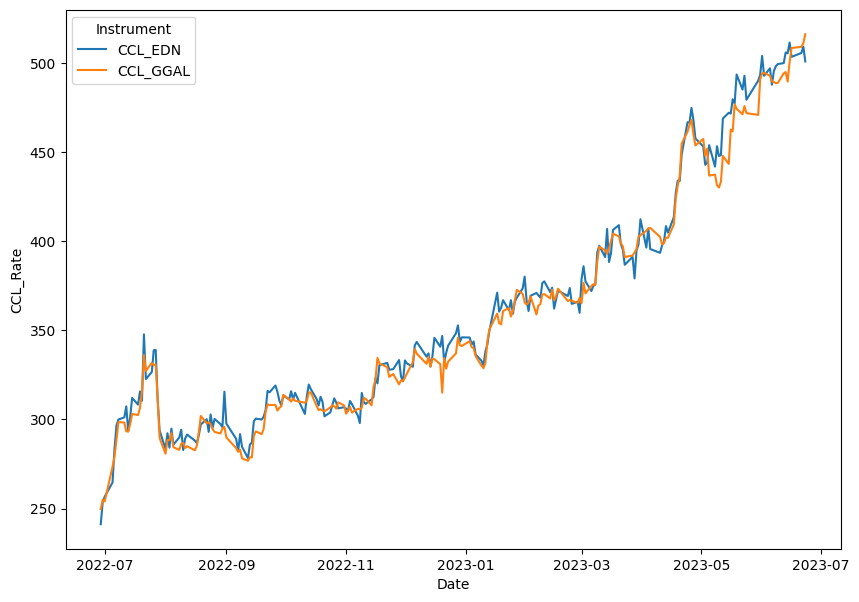

In [13]:
# Plot
plt.figure(figsize=(10, 7))
sns.lineplot(x='Date', y='CCL_Rate', hue='Instrument', data=df_melted)
plt.show()

# Once Cycle

In [14]:
# Example walking through one round-trip transaction

In [15]:
ticker_high

'GGAL'

In [16]:
ticker_low

'EDN'

In [17]:
# Purchase High ADR in NYSE
##TODO:determine transaction costs
adr_high = df_adr_high.iloc[-1, :]['Close_ADR']
usd_1 = -adr_high
usd_1

-16.780000686645508

In [18]:
# Check ADR High Multiplier
##American Depositary Shares, or ADSs, evidenced by American Depositary Receipts, each representing X Class B Common Shares
adr_mult_high

10

In [19]:
# Check ADR High Stock Price
stock_high = df_stock_high.iloc[-1, :]['Close_Stock']
stock_high

865.9000244140625

In [20]:
# Transfer ADR(NYSE) to Stock(Merval) and liquidate into pesos
##TODO:determine transfer and liquidation costs
ars_1 = adr_mult_high * stock_high
ars_1

8659.000244140625

In [21]:
# Check Stock Low Price
stock_low = df_stock_low.iloc[-1, :]['Close_Stock']
stock_low

366.79998779296875

In [22]:
# Check Stock Low ADR Multipler
adr_mult_low

20

In [23]:
# Purchase Stock(Merval) x ADR Multipler
ars_2 = stock_low * adr_mult_low
ars_2

7335.999755859375

In [24]:
# Calculate AR$ Balance
ars_balance = ars_1 - ars_2
ars_balance

1323.00048828125

In [25]:
# Check ADR Low Price
adr_low = df_adr_low.iloc[-1,:]['Close_ADR']
adr_low

14.649999618530273

In [26]:
# Convert from Stock(Merval) to ADR(NYSE) and liquidate into dollars
##TODO: conversaion and liquidation costs
usd_2 = adr_low
usd_2

14.649999618530273

In [27]:
# Check USD Balance
usd_balance = usd_1 + usd_2
usd_balance

-2.1300010681152344

In [28]:
# Check ARS Balance
ars_balance

1323.00048828125

In [29]:
ars_balance/usd_balance

-621.1266783316349

# Index

In [42]:
companies = [
    #'BBAR',
    #'BMA',
    'CEPU',
    'CRESY',
    'EDN',
    'GGAL',
    'SUPV',
    'IRS',
    'LOMA',
    'PAM',
    'TEO',
    'TS',
    'TX',
    'TGS']

multipliers = {
    #'BBAR': 3,  #https://www.sec.gov/ix?doc=/Archives/edgar/data/0000913059/000119312523118482/d264052d20f.htm
    #'BMA': 1,   #https://www.sec.gov/ix?doc=/Archives/edgar/data/0001347426/000119312523126614/d266368d20f.htm
    'CEPU': 10, #https://www.sec.gov/ix?doc=/Archives/edgar/data/0001717161/000165495423005229/cepu_20f.htm
    'CRESY': 1, #https://www.sec.gov/ix?doc=/Archives/edgar/data/0001034957/000165495422014335/abc_20f.htm
    'EDN': 20,  #https://www.sec.gov/ix?doc=/Archives/edgar/data/0001395213/000129281423001639/edndorm20f_2022.htm
    'GGAL': 10, #https://www.sec.gov/ix?doc=/Archives/edgar/data/0001114700/000119312522116900/d248187d20f.htm
    'SUPV': 5,  #https://www.sec.gov/ix?doc=/Archives/edgar/data/0001517399/000155837023006859/tmb-20221231x20f.htm
    'IRS': 10,  #https://www.sec.gov/ix?doc=/Archives/edgar/data/0000933267/000165495422014187/irsa_20f.htm
    'LOMA': 5,  #https://www.sec.gov/ix?doc=/Archives/edgar/data/0001711375/000171137523000005/loma-20221231.htm
    'PAM': 25,  #https://www.sec.gov/ix?doc=/Archives/edgar/data/0001469395/000129281423001936/pamform20f_2022.htm
    'TEO': 5,   #https://www.sec.gov/ix?doc=/Archives/edgar/data/0000932470/000110465923034541/teo-20221231x20f.htm
    'TS': 1,    #https://www.sec.gov/ix?doc=/Archives/edgar/data/0001190723/000155485523000209/ts-20221231.htm
    'TX': 1,    #https://www.sec.gov/ix?doc=/Archives/edgar/data/0001342874/000134287423000021/tx-20221231.htm
    'TGS': 1   #https://www.sec.gov/ix?doc=/Archives/edgar/data/0000931427/000114036123020256/brhc20051753_20f.htm
    }

In [43]:
data_dict = {}
one_month_ago = (pd.Timestamp.today() - pd.DateOffset(months=1)).strftime('%Y-%m-%d')
now = pd.Timestamp.today().strftime('%Y-%m-%d')

In [44]:
for company in companies:
    try:
        # Get the data for company and company.BA
        data_ADR = yf.download(company, start=one_month_ago, end=now)
        data_local = yf.download(f'{company}.BA', start=one_month_ago, end=now)

        # Check if the data is valid
        if data_ADR.empty or data_local.empty:
            print(f"Data for {company} or {company}.BA is empty. Skipping this ticker.")
            continue

        # Merge the dataframes
        data_ADR = data_ADR.rename(columns={'Close': f'Close_{company}'})
        data_local = data_local.rename(columns={'Close': f'Close_{company}.BA'})
        data = pd.concat([data_ADR[f'Close_{company}'], data_local[f'Close_{company}.BA']], axis=1)

        # Get the specific multiplier for the company from the dictionary
        multiplier = multipliers.get(company, 1)

        # Calculate company.BA / company * multiplier and add it to the dataframe
        data[f'Ratio_{company}'] = (data[f'Close_{company}.BA'] / data[f'Close_{company}']) * multiplier

        # Store the dataframe in the dictionary
        data_dict[company] = data
    except Exception as e:
        print(f"An exception occurred while processing {company}: {str(e)}")
        continue

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ERROR 
1 Failed download:
ERROR:yfinance:
1 Failed download:
ERROR ['CRESY.BA']: Exception('CRESY.BA: No timezone found, symbol may be delisted')
ERROR:yfinance:['CRESY.BA']: Exception('CRESY.BA: No timezone found, symbol may be delisted')



Data for CRESY or CRESY.BA is empty. Skipping this ticker.
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ERROR 
1 Failed download:
ERROR:yfinance:
1 Failed download:
ERROR ['IRS.BA']: Exception('IRS.BA: No timezone found, symbol may be delisted')
ERROR:yfinance:['IRS.BA']: Exception('IRS.BA: No timezone found, symbol may be delisted')



Data for IRS or IRS.BA is empty. Skipping this ticker.
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ERROR 
1 Failed download:
ERROR:yfinance:
1 Failed download:
ERROR ['PAM.BA']: Exception('PAM.BA: No timezone found, symbol may be delisted')
ERROR:yfinance:['PAM.BA']: Exception('PAM.BA: No timezone found, symbol may be delisted')



Data for PAM or PAM.BA is empty. Skipping this ticker.
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ERROR 
1 Failed download:
ERROR:yfinance:
1 Failed download:
ERROR ['TEO.BA']: Exception('TEO.BA: No timezone found, symbol may be delisted')
ERROR:yfinance:['TEO.BA']: Exception('TEO.BA: No timezone found, symbol may be delisted')



Data for TEO or TEO.BA is empty. Skipping this ticker.
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ERROR 
1 Failed download:
ERROR:yfinance:
1 Failed download:
ERROR ['TS.BA']: Exception('TS.BA: No timezone found, symbol may be delisted')
ERROR:yfinance:['TS.BA']: Exception('TS.BA: No timezone found, symbol may be delisted')



Data for TS or TS.BA is empty. Skipping this ticker.
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ERROR 
1 Failed download:
ERROR:yfinance:
1 Failed download:
ERROR ['TX.BA']: Exception('TX.BA: No timezone found, symbol may be delisted')
ERROR:yfinance:['TX.BA']: Exception('TX.BA: No timezone found, symbol may be delisted')



Data for TX or TX.BA is empty. Skipping this ticker.
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ERROR 
1 Failed download:
ERROR:yfinance:
1 Failed download:
ERROR ['TGS.BA']: Exception('TGS.BA: No timezone found, symbol may be delisted')
ERROR:yfinance:['TGS.BA']: Exception('TGS.BA: No timezone found, symbol may be delisted')



Data for TGS or TGS.BA is empty. Skipping this ticker.


In [45]:
# Create a dataframe for composite index
composite_index = pd.DataFrame(index=data_dict[list(data_dict.keys())[0]].index)
composite_index['composite_ratio'] = np.nan

for company in data_dict:
    composite_index['composite_ratio'] += data_dict[company][f'Ratio_{company}']

composite_index['composite_ratio'] /= len(companies)

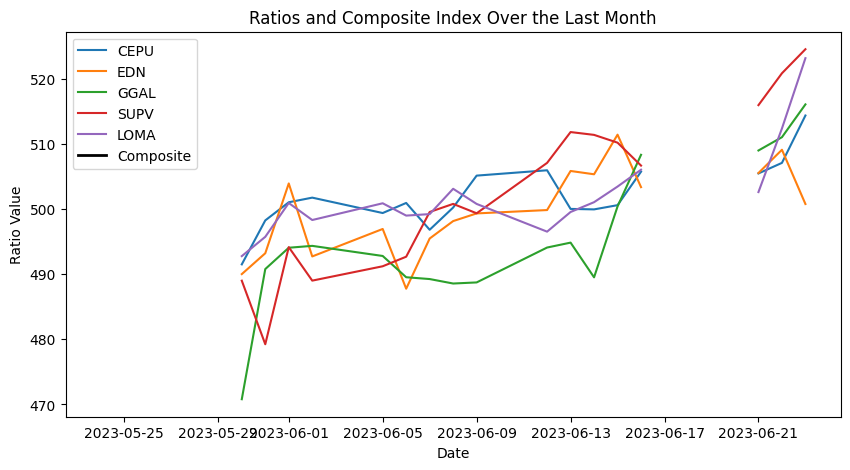

In [46]:
# Create a plot
plt.figure(figsize=(10,5))
for company in companies:
    if company in data_dict:
        plt.plot(data_dict[company].index, data_dict[company][f'Ratio_{company}'], label=company)
plt.plot(composite_index.index, composite_index['composite_ratio'], label='Composite', color='black', linewidth=2)
plt.legend()
plt.title('Ratios and Composite Index Over the Last Month')
plt.xlabel('Date')
plt.ylabel('Ratio Value')
plt.show()

# Arbitrage Scanner

In [47]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define list of companies and their multipliers
companies = ['CEPU', 'CRESY', 'EDN', 'GGAL', 'SUPV', 'IRS', 'LOMA', 'PAM', 'TEO', 'TS', 'TX', 'TGS']
multipliers = {'CEPU': 10, 'CRESY': 1, 'EDN': 20, 'GGAL': 10, 'SUPV': 5, 'IRS': 10, 'LOMA': 5, 'PAM': 25, 'TEO': 5, 'TS': 1, 'TX': 1, 'TGS': 1}

# Initialize data_dict to store data for each company
data_dict = {}

# Define start and end dates
one_month_ago = (pd.Timestamp.today() - pd.DateOffset(months=1)).strftime('%Y-%m-%d')
now = pd.Timestamp.today().strftime('%Y-%m-%d')

for company in companies:
    # Download data for each company
    data_ADR = yf.download(company, start=one_month_ago, end=now)
    data_local = yf.download(f'{company}.BA', start=one_month_ago, end=now)

    if data_ADR.empty or data_local.empty:
        print(f"Data for {company} or {company}.BA is empty. Skipping this ticker.")
        continue

    data_ADR = data_ADR.rename(columns={'Close': f'Close_{company}'})
    data_local = data_local.rename(columns={'Close': f'Close_{company}.BA'})
    data = pd.concat([data_ADR[f'Close_{company}'], data_local[f'Close_{company}.BA']], axis=1)
    multiplier = multipliers.get(company, 1)

    # Calculate company.BA / company * multiplier and add it to the dataframe
    data[f'Ratio_{company}'] = (data[f'Close_{company}.BA'] / data[f'Close_{company}']) * multiplier
    data_dict[company] = data

# Create a dataframe for composite index
composite_index = pd.DataFrame(index=data_dict[list(data_dict.keys())[0]].index)
composite_index['composite_ratio'] = np.nan

for company in data_dict:
    composite_index['composite_ratio'] += data_dict[company][f'Ratio_{company}']

composite_index['composite_ratio'] /= len(data_dict)

# Begin cycle for index of stocks
usd_1 = 0
ars_1 = 0

for company in companies:
    if company in data_dict:
        adr_high = data_dict[company].iloc[-1][f'Close_{company}']
        stock_high = data_dict[company].iloc[-1][f'Close_{company}.BA']
        mult_high = multipliers[company]

        usd_1 -= adr_high
        ars_1 += mult_high * stock_high

usd_2 = ars_1 / composite_index.iloc[-1]['composite_ratio']
usd_balance = usd_1 + usd_2

# Display results
print(f"Initial USD spent: {usd_1}")
print(f"Final ARS balance: {ars_1}")
print(f"Final USD balance: {usd_balance}")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ERROR 
1 Failed download:
ERROR:yfinance:
1 Failed download:
ERROR ['CRESY.BA']: Exception('CRESY.BA: No timezone found, symbol may be delisted')
ERROR:yfinance:['CRESY.BA']: Exception('CRESY.BA: No timezone found, symbol may be delisted')



Data for CRESY or CRESY.BA is empty. Skipping this ticker.
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ERROR 
1 Failed download:
ERROR:yfinance:
1 Failed download:
ERROR ['IRS.BA']: Exception('IRS.BA: No timezone found, symbol may be delisted')
ERROR:yfinance:['IRS.BA']: Exception('IRS.BA: No timezone found, symbol may be delisted')



Data for IRS or IRS.BA is empty. Skipping this ticker.
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ERROR 
1 Failed download:
ERROR:yfinance:
1 Failed download:
ERROR ['PAM.BA']: Exception('PAM.BA: No timezone found, symbol may be delisted')
ERROR:yfinance:['PAM.BA']: Exception('PAM.BA: No timezone found, symbol may be delisted')



Data for PAM or PAM.BA is empty. Skipping this ticker.
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ERROR 
1 Failed download:
ERROR:yfinance:
1 Failed download:
ERROR ['TEO.BA']: Exception('TEO.BA: No timezone found, symbol may be delisted')
ERROR:yfinance:['TEO.BA']: Exception('TEO.BA: No timezone found, symbol may be delisted')



Data for TEO or TEO.BA is empty. Skipping this ticker.
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ERROR 
1 Failed download:
ERROR:yfinance:
1 Failed download:
ERROR ['TS.BA']: Exception('TS.BA: No timezone found, symbol may be delisted')
ERROR:yfinance:['TS.BA']: Exception('TS.BA: No timezone found, symbol may be delisted')



Data for TS or TS.BA is empty. Skipping this ticker.
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ERROR 
1 Failed download:
ERROR:yfinance:
1 Failed download:
ERROR ['TX.BA']: Exception('TX.BA: No timezone found, symbol may be delisted')
ERROR:yfinance:['TX.BA']: Exception('TX.BA: No timezone found, symbol may be delisted')



Data for TX or TX.BA is empty. Skipping this ticker.
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ERROR 
1 Failed download:


ERROR:yfinance:
1 Failed download:
ERROR ['TGS.BA']: Exception('TGS.BA: No timezone found, symbol may be delisted')
ERROR:yfinance:['TGS.BA']: Exception('TGS.BA: No timezone found, symbol may be delisted')


Data for TGS or TGS.BA is empty. Skipping this ticker.
Initial USD spent: -47.950000286102295
Final ARS balance: 24580.249938964844
Final USD balance: nan
